In [1]:
# Importing necessary libraries
import numpy as np
import scipy as sc
from scipy.integrate import odeint, quad
import matplotlib.pyplot as plt

Example 2

C:\Users\Admin\AppData\Local\Temp\ipykernel_7364\1973479734.py:19: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Z1 = quad(sigma,f_th,np.inf)[0]
C:\Users\Admin\AppData\Local\Temp\ipykernel_7364\1973479734.py:20: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Z2 = quad(I,f_th,np.inf)[0]


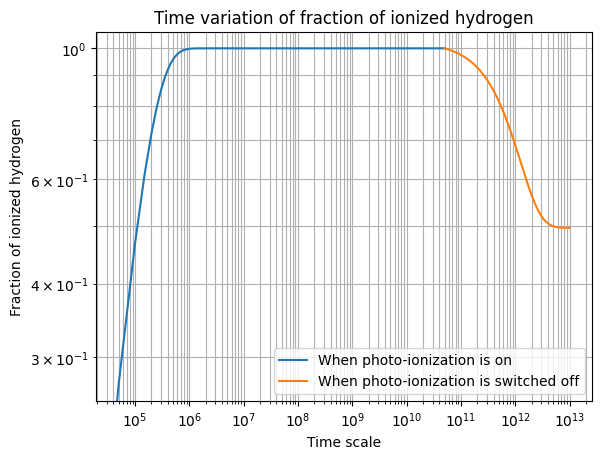

In [2]:
# Defining parameters.
h = 6.625*10**(-34)           # Planks constant
T = 10**5                     # Temperature
K = 1.38*10**(-23)            # Boltzman constant
c = 3*10**8                   # Speed of light
q = 1.6*10**(-19)             # Charge of electron
f_th = 13.6*q/h               # Threshold frequency
C_H = 2.56*10**(-13)          # Collision Ionization rate
alpha = 2.59* 10**(-13)       # Recombination rate
n = 1                         # Number density of hydrogen gas
N = 2                         # Number density of electron

# Calculating Phonionization rate.
def sigma(f):
  return ((6.3*(10**(-18))*(f_th/f)**3))/(h*f)

def I(f):
  return 1/(h*f)
Z1 = quad(sigma,f_th,np.inf)[0]
Z2 = quad(I,f_th,np.inf)[0]

Z = (float(Z1/Z2))*10**12

# Solving given differential equation.
def diff(y, t):
    return (1 - y)*(Z + N*C_H) - y*N*alpha
t = np.linspace(0,5*10**10,10**6)
A = odeint(diff,y0 = 0, t = t)

def diff2(y, t):
    return (1 - y)*(N*C_H) - y*N*alpha
t2 = np.linspace(5*10**10,10**13,10**3)
A2 = odeint(diff2,y0 = A[-1], t = t2)

# Plotting solution.
plt.plot(t,A,label = "When photo-ionization is on")
plt.plot(t2,A2,label = "When photo-ionization is switched off")
plt.xscale("log")
plt.yscale("log")
plt.title("Time variation of fraction of ionized hydrogen")
plt.xlabel("Time scale")
plt.ylabel("Fraction of ionized hydrogen")
plt.grid(True,"Both")
plt.legend()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7364\1905705498.py:22: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Lrr = 1e12 / quad(U, f_th, np.infty)[0]
C:\Users\Admin\AppData\Local\Temp\ipykernel_7364\1905705498.py:28: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  G = quad(I, f_th, np.infty)[0]


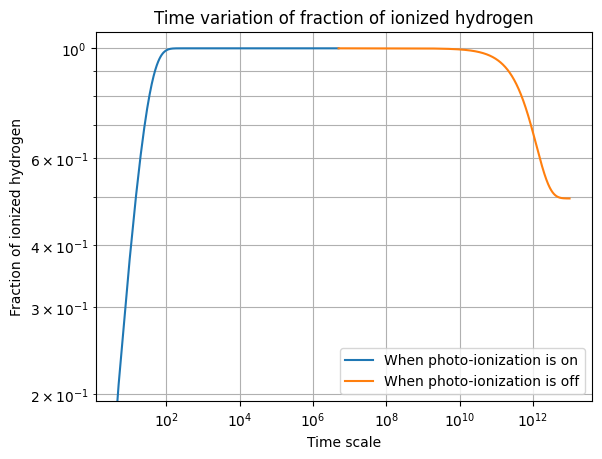

The plot is literally the same!!


In [3]:
# Similar code
# Defining parameters.
h = 6.625e-34  # Plank's constant
T = 1e5  # Temperature
K = 1.38e-23  # Boltzmann constant
c = 3e8  # Speed of light
q = 1.6e-19  # Charge of electron
f_th = 13.6 * q / h  # Threshold frequency
C_H = 2.56e-13  # Collision Ionization rate
alpha = 2.59e-13  # Recombination rate
n = 1  # Number density of hydrogen gas
N = 2  # Number density of electron
sigma = 6.38e-18

# Defining Plank's radiation law
def U(f):
    intensity = (2 * h * f**3) / (c**2 * (np.exp((h * f) / (K * T)) - 1))
    return intensity

# Getting value of luminosity by normalizing it
# Use the epsrel parameter for better integration convergence
Lrr = 1e12 / quad(U, f_th, np.infty)[0]

# Getting photoionization rate from above expression.
def I(f):
    return Lrr * sigma * (f_th / f)**3

G = quad(I, f_th, np.infty)[0]

# Defining differential equation to explain chemistry
def diff(y, t):
    return (1 - y) * (G + N * C_H) - y * N * alpha

# Solving differential equation
t1 = np.linspace(0, 5*10**6, 10**6)
A1 = odeint(diff, y0=0, t=t1)

# For off state
def diff2(y, t):
    return (1 - y)*(N*C_H) - y*N*alpha
t22 = np.linspace(5*10**6,10**13,10**4)
A22 = odeint(diff2,y0 = A1[-1], t = t22)

# Plotting solution.
plt.plot(t1, A1, label="When photo-ionization is on")
plt.plot(t22, A22, label="When photo-ionization is off")
plt.xscale("log")
plt.yscale("log")
plt.title("Time variation of fraction of ionized hydrogen")
plt.xlabel("Time scale")
plt.ylabel("Fraction of ionized hydrogen")
plt.grid(True, "Both")
plt.legend()
plt.show()
print("The plot is literally the same!!")

Assignment

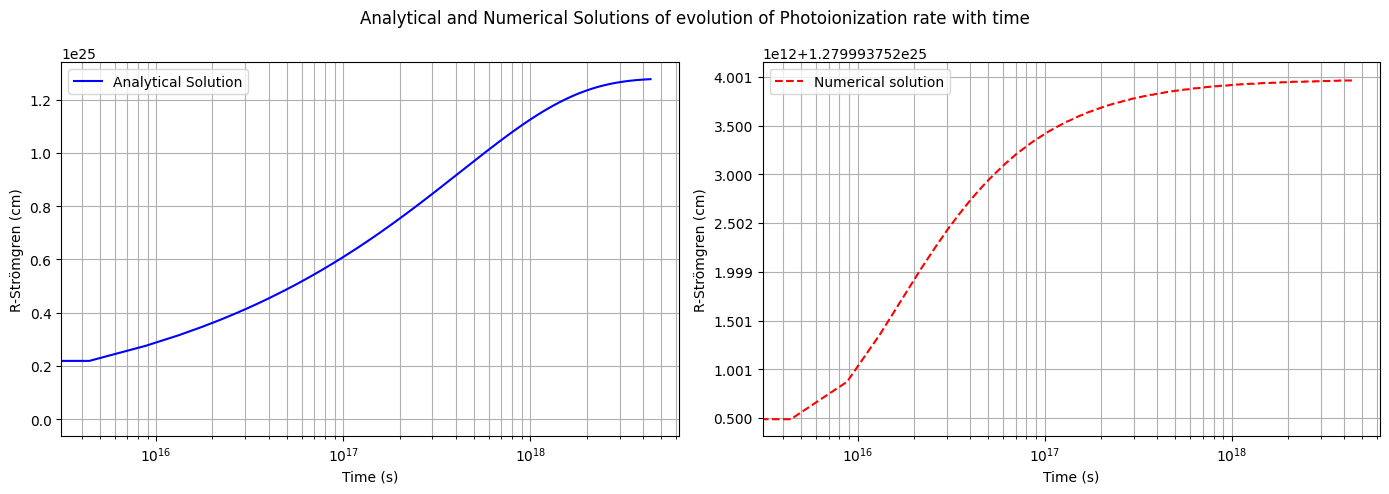

In [4]:
# Defining Parameters
N = 1000                                    # Number of grid cells
dr = 1.0                                    # Cell size
l = np.cumsum(dr*np.ones(N))                # Length scale
r = np.arange(0.5 * dr, N * dr, dr)         # Grid of spherical shells
alpha_f = 3.59e-7 / (365 * 24 * 3600)       # Adjusted for years
h_f_th = 13.6                               # Threshold energy in eV
tau_f = alpha_f * l                         # Opacity
d_tau = tau_f[1]-tau_f[0]                   # Opacity of given grid (same)
n_e = 1e6                                   # Electron density
f_th = 13.6                                 # Thresholf frequency
C = 1.0                                     # Clumping factor
n_H_mean = 1e-4                             # Mean density of the universe at redshift z = 9
N_ph_dot = 1e54                             # Ionizing photon production rate per sec

# Variable shell of the volume
V_shell_1 = np.cumsum(((4 / 3) * np.pi * ((r + 0.5 * dr)**3 - (r - 0.5 * dr)**3))*np.ones(N)) # Defined as instructed.

# Analytical expressions for Strömgren radius (The Strömgren radius is a characteristic radius that defines the size of the ionized region around a source of ionizing radiation) and recombination time
R = ((3 * N_ph_dot) / (4 * np.pi * alpha_f * C * n_H_mean**2))**(1/3)
t_rec = 1 / (C * alpha_f * n_H_mean)

# Integrand to calculate photoionisation rate
def photoionization_rate(tem_tau_f, n_e, V_shell_temp, d_tau):                      
    return np.exp(-tem_tau_f) * (1 - np.exp(-d_tau)) / (h_f_th * n_e * np.sum(V_shell_temp))  # Storing as temporary variable such that for each step, it takes volume of upto that point

# Storring the photoionisation rate 
Gamma = []
for i in range(N):
    V_shell_temp=V_shell_1[i]
    tem_tau_f = tau_f[i]
    G = quad(photoionization_rate, f_th, np.inf, args=(n_e, V_shell_temp, tem_tau_f))[0]
    Gamma.append(G)

# Analytical solution
T = N
t = np.linspace(0, 5 * t_rec, T)
G_A = R * (1 - np.exp(-t / t_rec))**(1/3)

# Numerical solution 
G_N = R * np.exp(-(Gamma * t))

# Plot results
plt.figure(figsize=(14, 5))

# Analytic solution
plt.subplot(1, 2, 1)
plt.plot(t, G_A, label = "Analytical Solution", color = "blue")
plt.xlabel("Time (s)")
plt.ylabel("R-Strömgren (cm)")
plt.xscale("log")
# plt.yscale("log")
plt.grid(True, which="both")
plt.legend()

# Numerical solution
plt.subplot(1, 2, 2)
plt.plot(t, G_N, label = "Numerical solution", linestyle = "--", color = "red")
plt.xlabel("Time (s)")
plt.ylabel("R-Strömgren (cm)")
plt.xscale("log")
# plt.yscale("log")
plt.grid(True, which="both")
plt.legend()

plt.suptitle("Analytical and Numerical Solutions of evolution of Photoionization rate with time")
plt.tight_layout()
plt.show()

In [6]:
# print(np.mean(G_A),np.mean(G_N))
# print(np.median(G_A),np.median(G_N))